Task 3 : Credit_card_fraud_detection

In [1]:
# Importing Libraries and Loading the Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# Loading the dataset
file_path = "C:/Users/91707/OneDrive/Desktop/CodSoft/Tasks/CREDIT_CARD_FRAUD_DETECTION/creditcard.csv"
data = pd.read_csv(file_path)
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

In [2]:
# Defining Features and Target Variable
X = data.drop('Class', axis=1)
y = data['Class']
# Splitting the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [3]:
# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [4]:
# Feature Scaling
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

In [5]:
# Initializing and training the Logistic Regression model with class weighting and increased max_iter
logreg_model = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)
logreg_model.fit(X_train_sm, y_train_sm)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

In [6]:
# Making predictions on the test set
y_pred = logreg_model.predict(X_test)
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

In [7]:
# Evaluating the model 
report = classification_report(y_test, y_pred, output_dict=True)
# Converting the report to a DataFrame for better readability and saving
report_df = pd.DataFrame(report).transpose()
# Printing the classification report
print(report_df)
# Saving the prediction results to a CSV file
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted_Prob': y_pred_prob})
predictions.to_csv('logistic_regression_predictions.csv', index=False)
print("Predictions saved to logistic_regression_predictions.csv")

              precision    recall  f1-score       support
0              0.999822  0.990064  0.994919  56864.000000
1              0.134763  0.897959  0.234354     98.000000
accuracy       0.989906  0.989906  0.989906      0.989906
macro avg      0.567293  0.944012  0.614637  56962.000000
weighted avg   0.998334  0.989906  0.993611  56962.000000
Predictions saved to logistic_regression_predictions.csv


Text(0.5, 1.0, 'Actual vs Predicted Values')

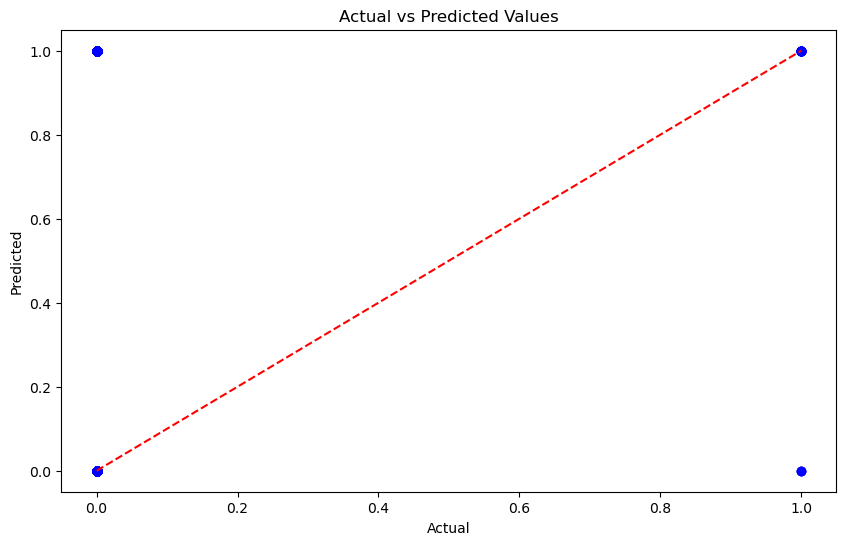

In [8]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')